In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [1]:
# Visual Python
!pip install visualpython --upgrade

     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.1 MB ? eta 

ERROR: Exception:
Traceback (most recent call last):
  File "E:\Programmer\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\Programmer\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "E:\Programmer\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "E:\Programmer\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "E:\Programmer\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "E:\Programmer\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "E:\Programmer\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "E:\Programmer\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "E:\Programmer

In [2]:
# Visual Python
!visualpy install

Package install command: pip
Already exists Visual Python.
Remove Visual Python Directories.
Copy visualpython extension files ...
------------------------------------------------------------------------------------------
Source Dir : e:\programmer\lib\site-packages\visualpython
Target Dir : E:\Programmer\share\jupyter\nbextensions\visualpython
448 File(s) copied


Disabling notebook extension visualpython/visualpython...
      - Validating: ok
Enabling notebook extension visualpython/visualpython...
      - Validating: ok


In [2]:
df = web.DataReader('AAPL', 'yahoo', start = '2010-01-01', end = '2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


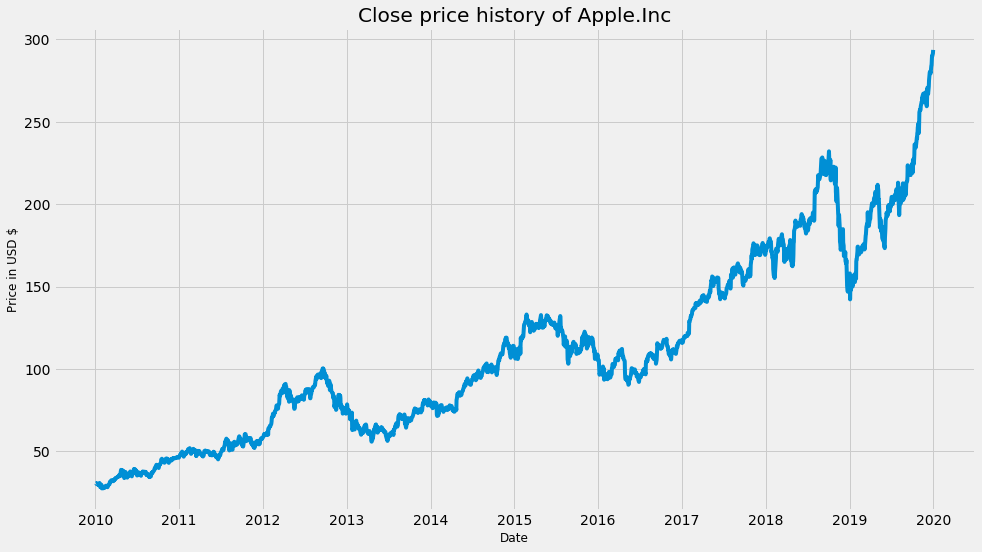

In [3]:
plt.figure(figsize = (14.7, 8.27))
plt.title('Close price history of Apple.Inc')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price in USD $', fontsize = 12)
plt.show()

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2013

In [5]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [6]:
train_data = scaled_data[0: training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([1.17842746e-02, 1.19828231e-02, 1.01529342e-02, 9.94365298e-03,
       1.06949303e-02, 9.69144079e-03, 8.40890719e-03, 9.98121756e-03,
       9.32653484e-03, 7.44834859e-03, 1.23369964e-02, 1.05607711e-02,
       8.59672295e-03, 3.05875883e-03, 5.91360280e-03, 7.45371496e-03,
       8.49476910e-03, 3.88515821e-03, 5.36636927e-06, 1.43815114e-03,
       2.04453654e-03, 3.85295999e-03, 0.00000000e+00, 1.82988893e-03,
       1.11080978e-03, 2.22162672e-03, 1.64743954e-03, 3.55245048e-03,
       4.47007813e-03, 6.09068582e-03, 5.63455876e-03, 5.83847363e-03,
       5.16232543e-03, 4.49154361e-03, 2.68848652e-03, 4.62033647e-03,
       5.33941562e-03, 6.74536854e-03, 9.09042176e-03, 9.01529259e-03,
       9.27287115e-03, 1.00134158e-02, 1.44352037e-02, 1.45049594e-02,
       1.66192659e-02, 1.75959164e-02, 1.79500968e-02, 1.85403831e-02,
       1.70592938e-02, 1.73866352e-02, 1.72095522e-02, 1.74939626e-02,
       1.62060626e-02, 1.75476263e-02, 1.94848354e-02, 2.00268316e-02,
     

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size = 10, epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





1953/1953 [==============================] - 17s 9ms/step - loss: 0.0016
Epoch 2/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.7395e-04
Epoch 3/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.5925e-04
Epoch 4/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.2596e-04
Epoch 5/10
1953/1953 [==============================] - 15s 8ms/step - loss: 1.4090e-04
Epoch 6/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.1849e-04
Epoch 7/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.0759e-04
Epoch 8/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.0280e-04
Epoch 9/10
1953/1953 [==============================] - 16s 8ms/step - loss: 1.1279e-04
Epoch 10/10
1953/1953 [==============================] - 16s 8ms/step - loss: 8.3636e-05


In [0]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.3111190037509317

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


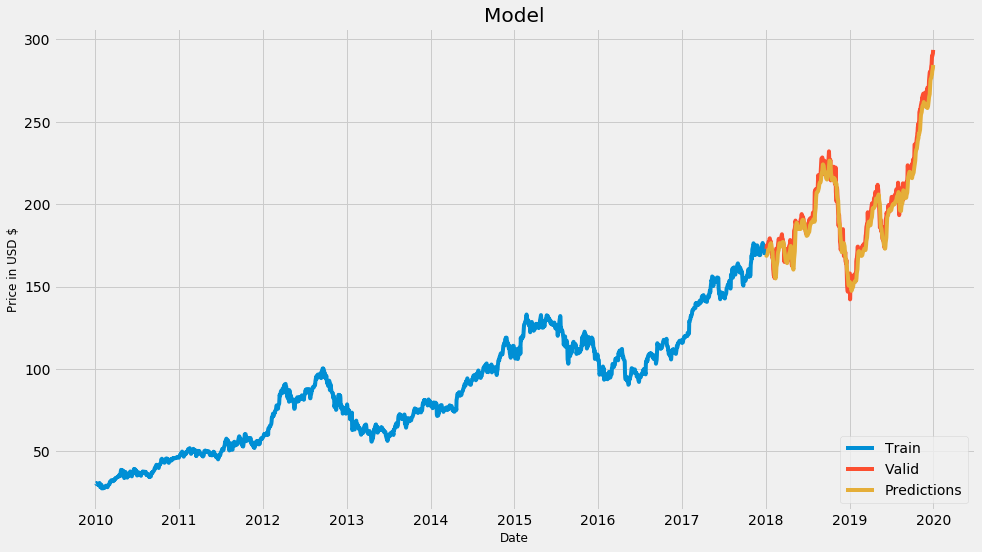

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (14.7, 8.27))
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price in USD $', fontsize = 12)
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()

In [18]:
valid

,Close,Predictions
Date,,
2018-01-02,172.259995,169.247284
2018-01-03,172.229996,168.735229
2018-01-04,173.029999,168.621429
2018-01-05,175.000000,168.888275
2018-01-08,174.350006,169.669952
...,...,...
2019-12-24,284.269989,277.743225
2019-12-26,289.910004,278.755676
2019-12-27,289.799988,280.675995


In [19]:
apple_quote = web.DataReader('AAPL', 'yahoo', start = '2010-01-01', end = '2019-12-31')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[286.44794]]


In [20]:
apple_quote2 = web.DataReader('AAPL', 'yahoo', start = '2020-01-02', end = '2020-01-02')
print(apple_quote2['Close'])

Date
2020-01-02    300.350006
Name: Close, dtype: float64
